## Regresión Lineal.
Autor: Jośe Falcón


La regresión lineal es un modelo matemático que consiste en encontrar la **ecuación lineal** que mejor se ajuste o aproxime a un conjunto de datos dado. Dicho de otra manera, se busca aproximar la relación de dependencia entre una variable dependiente $Y$ y variables independientes $x_i$ de la siguiente forma:

$$Y=\sum_{i=0}^d \hat{\beta}_{i}x_i$$

en donde a los $\hat{\beta}_i$ se les conoce como **estimadores o pesos**. Vamos a considerar a $x_0=1$

Cuando nos referimos a la que mejor **aproxime** es en el sentido de aquella ecuación lineal que minimice una función llamada **función de error o de costo**, por lo que la regresión lineal se convierte en un problema de minimización


<div style="text-align: center"><img src="https://economipedia.com/wp-content/uploads/Regresi%C3%B3n-lineal.png"></div>

Durante este notebook vamos a deducir la ecuación
$$\hat{\beta} = (X^TX)^{-1}X^TY$$
en donde $X$ es el conjunto de datos, $Y$ la variable dependiente, y $\hat{\beta}$ es el vector de estimadores o de pesos

**Definición 1:** Sea $w \in \mathbb{R}^n$ y $x \in \mathbb{R}^m$, definimos la derivada de x con respecto a w como:
$$\frac{dx}{dw} = \begin{pmatrix}
\frac{\partial x_1}{\partial w_1} & \dots & \frac{\partial x_1}{\partial w_n}\\
\vdots & \ddots & \vdots\\
\frac{\partial x_m}{\partial w_1} & \dots & \frac{\partial x_m}{\partial w_n}
\end{pmatrix}
$$
es decir $\left(\frac{dx}{dw}\right)_{ij}= \frac{\partial x_i}{\partial w_j}$

**Proposición 1:** Sea $A \in M_{nxm}(\mathbb{R})$ y $w \in \mathbb{R}^m$ (o equivalentemente $w \in M_{mx1}(\mathbb{R})$). Si las entradas de $A$ no dependen de las entradas de $w$ entonces:
$$\frac{d(Aw)}{dw} = A$$
Demostración:
$$(Aw)_i = \sum_{k = 1}^n A_{ik}w_k$$
$$\implies \left(\frac{d(Aw)}{dw}\right)_{ij} = \frac{\partial (Aw)_i}{\partial w_j} = \frac{\partial \left(\sum_{k = 1}^n A_{ik}w_k\right)}{\partial w_j} = \sum_{k = 1}^n \frac{\partial(A_{ik}w_k)}{\partial w_j} = \sum_{k = 1}^n A_{ik}\frac{\partial w_k}{\partial w_j} = \sum_{k = 1}^n A_{ik}\delta_{kj} = A_{ij}$$

Por lo tanto $$ \left(\frac{d(Aw)}{dw}\right)_{ij} = A_{ij}$$
y se concluye que:
$$\frac{d(Aw)}{dw} = A$$

**Corolario**: Sea $A \in M_{mxn}(\mathbb{R})$ y $w \in \mathbb{R}^m$ (o equivalentemente $w \in M_{mx1}(\mathbb{R})$). Si las entradas de $A$ no dependen de las entradas de $w$ entonces:
$$\frac{d(w^TA)}{dw} = A^T$$

Para la regresión lineal vamos a utilizar la función RSS, la cual es:

$$RSS = \sum_{i = 1}^n (y_i - \hat{y}_i)^2$$

Esta función se conoce normalmente como la "función de costo", "loss function" o "función de error". Nos da la suma del error cuadrático para cada una de las predicciones.
Esta sería una función que depende de los estimadores $\hat{\beta_i}$ o el vector de estimadores $\hat{\beta}$.

Sea $X \in M_{nxp}\left(\mathbb{R}\right)$ el conjunto de datos y $\hat{\beta} \in M_{px1}\left(\mathbb{R}\right)$ el vector de estimadores, entonces
$$\hat{y} = X\hat{\beta}$$
Podemos reescribir a RSS en forma matricial como:
$$RSS = \sum_{i = 1}^n (y_i - \hat{y}_i)^2 = (y-\hat{y})^T(y-\hat{y})$$


![](https://iartificial.net/wp-content/uploads/2018/12/error-regresion-lineal2.png)

Lo que queremos hacer es obtener los estimadores o pesos que minimicen dicha función de error.

$$(AB)^T=B^TA^T$$

**Proposición 2:** El vector de estimadores que minimiza a RSS es:
$$\hat{\beta} = \left(X^TX\right)^{-1}X^Ty$$

Demostración:
$$RSS = (y-\hat{y})^T(y-\hat{y}) = y^Ty-y^T\hat{y}-\hat{y}^Ty+\hat{y}^T\hat{y} = y^Ty-y^TX\hat{\beta}-\hat{\beta}^TX^Ty+\hat{\beta}^TX^TX\hat{\beta}$$

Derivamos la expresión anterior con respecto a $\hat{\beta}$ e igualamos la derivada a 0 para encontrar el vector de estimadores que minimiza el error RSS:
$$\frac{dRSS}{d\hat{\beta}} \stackrel{Proposición 1}{=} -2y^TX + 2\hat{\beta}^TX^TX=0$$
$$\implies y^TX=\hat{\beta}^TX^TX$$
$$\implies X^TX\hat{\beta}=X^Ty$$
$$\implies \hat{\beta} = (X^TX)^{-1}X^Ty$$

# Problema 1

Tenemos un conjunto de datos que nos dice el salario dado el número de años de experiencia en una empresa.

## a) 
Realiza una gráfica de y= SALARIO versus x= AÑOS DE EXPERIENCIA

In [261]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [262]:
dataset = pd.read_csv("../datasets/Salary_Data.csv")

In [263]:
type(dataset)

pandas.core.frame.DataFrame

In [264]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [265]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [266]:
dataset.shape

(30, 2)

In [267]:
x = dataset["YearsExperience"].values

In [268]:
x 

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [269]:
y = dataset["Salary"].values

In [270]:
y 

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

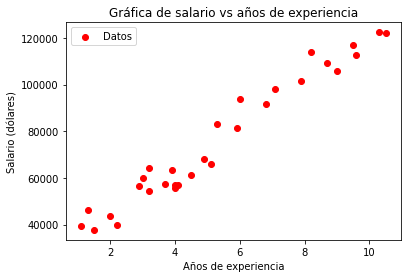

In [271]:

plt.scatter(x,y,color="red", label ="Datos")
plt.title("Gráfica de salario vs años de experiencia")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario (dólares)")
plt.legend()
plt.show()

## b)
Encuentra los estimadores por mínimos cuadrados $\widehat\beta_0$ y $\widehat\beta_1$.

In [272]:
len(x)

30

In [273]:
x_unos = np.ones((30,1))

In [274]:
x_unos

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [275]:
x = x.reshape((30,1))

In [276]:
x.shape

(30, 1)

In [277]:
X = np.concatenate((x_unos,x), axis = 1) #Axis = 0 es renglones, Axis=1 es columnas

In [278]:
X.shape

(30, 2)

In [279]:
X

array([[ 1. ,  1.1],
       [ 1. ,  1.3],
       [ 1. ,  1.5],
       [ 1. ,  2. ],
       [ 1. ,  2.2],
       [ 1. ,  2.9],
       [ 1. ,  3. ],
       [ 1. ,  3.2],
       [ 1. ,  3.2],
       [ 1. ,  3.7],
       [ 1. ,  3.9],
       [ 1. ,  4. ],
       [ 1. ,  4. ],
       [ 1. ,  4.1],
       [ 1. ,  4.5],
       [ 1. ,  4.9],
       [ 1. ,  5.1],
       [ 1. ,  5.3],
       [ 1. ,  5.9],
       [ 1. ,  6. ],
       [ 1. ,  6.8],
       [ 1. ,  7.1],
       [ 1. ,  7.9],
       [ 1. ,  8.2],
       [ 1. ,  8.7],
       [ 1. ,  9. ],
       [ 1. ,  9.5],
       [ 1. ,  9.6],
       [ 1. , 10.3],
       [ 1. , 10.5]])


$$\hat{\beta} = (X^TX)^{-1}X^Ty$$


In [280]:
y = y.reshape((30,1))

In [281]:
y.shape

(30, 1)

In [282]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [283]:
aux1= np.matmul(X.T,X)
aux2= np.linalg.inv(aux1)
aux3= np.matmul(aux2, X.T)
pesos = np.matmul(aux3,y)

In [284]:
pesos

array([[25792.20019867],
       [ 9449.96232146]])

## c)
Haz la gráfica de la curva de ajuste $\widehat y=\widehat\beta_0+\widehat\beta_1x$


predicción = $$X\beta$$

In [285]:
pred = np.matmul(X,pesos)

In [286]:
pred

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

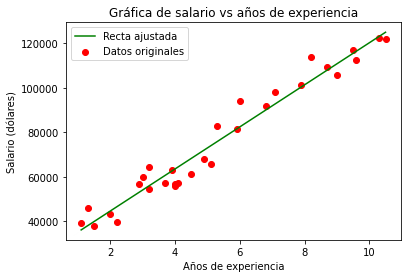

In [287]:
plt.scatter(x,y,color="red", label ="Datos originales")
plt.plot(x,pred.ravel(), color="green", label="Recta ajustada")
plt.title("Gráfica de salario vs años de experiencia")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario (dólares)")
plt.legend()
plt.show()

# Problema 2

El banco internacional UBS produce regularmente un informe (UBS, 2009) sobre los precios y las ganancias en las principales ciudades del mundo. Tres de las medidas que incluyen son los precios de los productos básicos, a saber, 1 kg de arroz, una barra de pan de 1 kg y el precio de una hamburguesa Big Mac en McDonalds. Una característica interesante de los precios que informan es que los precios se miden en los minutos de trabajo necesarios para que un trabajador "típico" en ese lugar gane suficiente dinero para comprar el producto. El uso de minutos de trabajo corrige al menos en parte las fluctuaciones monetarias, las tasas salariales vigentes y los precios locales. El archivo de datos incluye mediciones de precios de arroz, pan y Big Mac de los informes de 2003 y 2009. El año 2003 fue antes de que la gran recesión golpeara a gran parte del mundo alrededor de 2006, y el año 2009 puede reflejar cambios en los precios debido a la recesión.

# a) 
Realiza un gráfico de dispersión de y = rice2009 versus x = rice2003, los precios del
arroz en 2009 y en 2003, respectivamente.


In [288]:
dataset_2 = pd.read_csv("../datasets/UBSprices.csv")

In [289]:
dataset_2.head()

,Unnamed: 0,bigmac2009,bread2009,rice2009,bigmac2003,bread2003,rice2003
0,Amsterdam,19,10,11.0,16,9,9
1,Athens,30,13,27.0,21,12,19
2,Auckland,19,19,13.0,19,19,9
3,Bangkok,45,43,27.0,50,42,25
4,Barcelona,21,17,8.0,22,19,10


In [290]:
dataset_2.shape

(54, 7)

In [291]:
x_2 = dataset_2["rice2003"].values

In [292]:
x_2

array([ 9, 19,  9, 25, 10, 16, 16, 28, 12, 21, 22, 17,  7,  5, 16, 14, 16,
        7, 12, 34, 20, 14, 28, 21, 11, 24, 14, 14, 12, 19, 26, 11, 15, 11,
       18, 96, 70, 12, 18, 17, 28, 22, 38, 11, 28, 15,  8, 12, 26, 18, 10,
       10, 23, 16])

In [293]:
y_2 = dataset_2["rice2009"].values

In [294]:
y_2

array([11. , 27. , 13. , 27. ,  8. , 17. , 21. , 25. , 11. , 44. , 65. ,
       14. ,  9. , 11. , 16. , 11. , 16. , 10. , 11. , 43. , 47. , 17. ,
       32. , 23. ,  9. , 20. ,  8. ,  9. , 11. , 25. , 38. , 10. , 21. ,
       16. , 12. , 37. , 49. , 12. , 20. , 21. , 30. , 25. , 20. , 17. ,
       44. , 17. , 11. , 12. , 18. , 21. , 10.5, 14. , 74.5, 45.5])

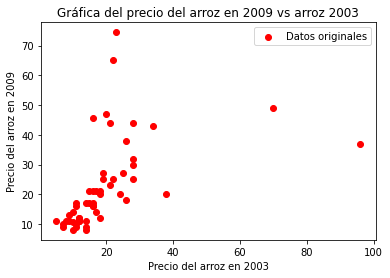

In [295]:
plt.scatter(x_2,y_2,color="red", label="Datos originales")
plt.ylabel("Precio del arroz en 2009")
plt.xlabel("Precio del arroz en 2003")
plt.title("Gráfica del precio del arroz en 2009 vs arroz 2003")
plt.legend()
plt.show() 

# b)
Encuentra los estimadores por mínimos cuadrados $\widehat\beta_0$ y $\widehat\beta_1$. 

$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

In [296]:
def regresion_lineal(X,y):
    m_1 = np.matmul(X.T,X)
    m_2 = np.linalg.inv(m_1)
    m_3 = np.matmul(m_2,X.T)
    return np.matmul(m_3,y)
    

In [297]:
len(x_2)

54

In [298]:
x_2_unos = np.ones((len(x_2),1))

In [299]:
x_2_unos

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [300]:
x_2 = x_2.reshape((-1,1))

In [301]:
x_2 

array([[ 9],
       [19],
       [ 9],
       [25],
       [10],
       [16],
       [16],
       [28],
       [12],
       [21],
       [22],
       [17],
       [ 7],
       [ 5],
       [16],
       [14],
       [16],
       [ 7],
       [12],
       [34],
       [20],
       [14],
       [28],
       [21],
       [11],
       [24],
       [14],
       [14],
       [12],
       [19],
       [26],
       [11],
       [15],
       [11],
       [18],
       [96],
       [70],
       [12],
       [18],
       [17],
       [28],
       [22],
       [38],
       [11],
       [28],
       [15],
       [ 8],
       [12],
       [26],
       [18],
       [10],
       [10],
       [23],
       [16]])

In [302]:
X_2 = np.concatenate((x_2_unos,x_2), axis = 1)

In [303]:
X_2.shape

(54, 2)

In [304]:
X_2 

array([[ 1.,  9.],
       [ 1., 19.],
       [ 1.,  9.],
       [ 1., 25.],
       [ 1., 10.],
       [ 1., 16.],
       [ 1., 16.],
       [ 1., 28.],
       [ 1., 12.],
       [ 1., 21.],
       [ 1., 22.],
       [ 1., 17.],
       [ 1.,  7.],
       [ 1.,  5.],
       [ 1., 16.],
       [ 1., 14.],
       [ 1., 16.],
       [ 1.,  7.],
       [ 1., 12.],
       [ 1., 34.],
       [ 1., 20.],
       [ 1., 14.],
       [ 1., 28.],
       [ 1., 21.],
       [ 1., 11.],
       [ 1., 24.],
       [ 1., 14.],
       [ 1., 14.],
       [ 1., 12.],
       [ 1., 19.],
       [ 1., 26.],
       [ 1., 11.],
       [ 1., 15.],
       [ 1., 11.],
       [ 1., 18.],
       [ 1., 96.],
       [ 1., 70.],
       [ 1., 12.],
       [ 1., 18.],
       [ 1., 17.],
       [ 1., 28.],
       [ 1., 22.],
       [ 1., 38.],
       [ 1., 11.],
       [ 1., 28.],
       [ 1., 15.],
       [ 1.,  8.],
       [ 1., 12.],
       [ 1., 26.],
       [ 1., 18.],
       [ 1., 10.],
       [ 1., 10.],
       [ 1.,

In [305]:
y_2 = y_2.reshape((-1,1))

In [306]:
y_2.shape

(54, 1)

In [307]:
pesos_2 = regresion_lineal(X_2,y_2)

In [308]:
pesos_2

array([[12.584192  ],
       [ 0.50138309]])

# c)

Haz la gráfica de la curva de ajuste $\widehat y=\widehat\beta_0+\widehat\beta_1x$


In [309]:
y_2_pred = np.matmul(X_2,pesos_2)

In [310]:
y_2_pred.shape

(54, 1)

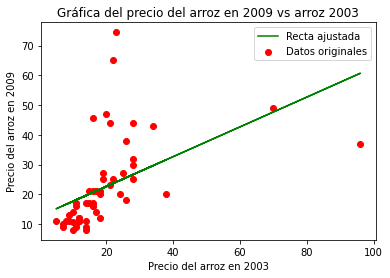

In [311]:
plt.scatter(x_2,y_2,color="red", label="Datos originales")
plt.plot(x_2,y_2_pred.ravel(), color="green", label="Recta ajustada")
plt.ylabel("Precio del arroz en 2009")
plt.xlabel("Precio del arroz en 2003")
plt.title("Gráfica del precio del arroz en 2009 vs arroz 2003")
plt.legend()
plt.show() 

# d)
Realiza nuevamente un gráfico de dispersión pero usando escalas logarítmicas, es decir, realiza el gráfico de dispersión de $y=\log(\mathtt{rice2009})$ versus $x=\log(\mathtt{rice2003})$.

# e)
Repite los incisos (b) y (c) pero con este representación alternativa en escalas logarítmicas.

In [312]:
x_2_log = np.log(x_2)

In [313]:
x_2_log

array([[2.19722458],
       [2.94443898],
       [2.19722458],
       [3.21887582],
       [2.30258509],
       [2.77258872],
       [2.77258872],
       [3.33220451],
       [2.48490665],
       [3.04452244],
       [3.09104245],
       [2.83321334],
       [1.94591015],
       [1.60943791],
       [2.77258872],
       [2.63905733],
       [2.77258872],
       [1.94591015],
       [2.48490665],
       [3.52636052],
       [2.99573227],
       [2.63905733],
       [3.33220451],
       [3.04452244],
       [2.39789527],
       [3.17805383],
       [2.63905733],
       [2.63905733],
       [2.48490665],
       [2.94443898],
       [3.25809654],
       [2.39789527],
       [2.7080502 ],
       [2.39789527],
       [2.89037176],
       [4.56434819],
       [4.24849524],
       [2.48490665],
       [2.89037176],
       [2.83321334],
       [3.33220451],
       [3.09104245],
       [3.63758616],
       [2.39789527],
       [3.33220451],
       [2.7080502 ],
       [2.07944154],
       [2.484

In [314]:
y_2_log = np.log(y_2)

In [315]:
X_2_log = np.concatenate((x_2_unos,x_2_log), axis = 1)

In [316]:
X_2_log

array([[1.        , 2.19722458],
       [1.        , 2.94443898],
       [1.        , 2.19722458],
       [1.        , 3.21887582],
       [1.        , 2.30258509],
       [1.        , 2.77258872],
       [1.        , 2.77258872],
       [1.        , 3.33220451],
       [1.        , 2.48490665],
       [1.        , 3.04452244],
       [1.        , 3.09104245],
       [1.        , 2.83321334],
       [1.        , 1.94591015],
       [1.        , 1.60943791],
       [1.        , 2.77258872],
       [1.        , 2.63905733],
       [1.        , 2.77258872],
       [1.        , 1.94591015],
       [1.        , 2.48490665],
       [1.        , 3.52636052],
       [1.        , 2.99573227],
       [1.        , 2.63905733],
       [1.        , 3.33220451],
       [1.        , 3.04452244],
       [1.        , 2.39789527],
       [1.        , 3.17805383],
       [1.        , 2.63905733],
       [1.        , 2.63905733],
       [1.        , 2.48490665],
       [1.        , 2.94443898],
       [1.

In [317]:
pesos_2_log = regresion_lineal(X_2_log,y_2_log)

In [318]:
pesos_2_log

array([[0.74703458],
       [0.77865709]])

In [319]:
y_2_log_pred = np.matmul(X_2_log, pesos_2_log)

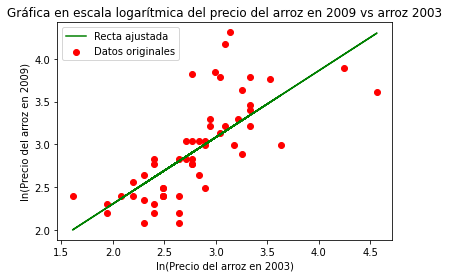

In [320]:
plt.scatter(x_2_log,y_2_log,color="red", label="Datos originales")
plt.plot(x_2_log,y_2_log_pred.ravel(), color="green", label="Recta ajustada")
plt.ylabel("ln(Precio del arroz en 2009)")
plt.xlabel("ln(Precio del arroz en 2003)")
plt.title("Gráfica en escala logarítmica del precio del arroz en 2009 vs arroz 2003")
plt.legend()
plt.show() 

# f) Regresando a la expresión original.
En la parte anterior, se realizó una regresión lineal para las variables $ln(y) = \beta_{0} + \beta_1ln(x)$, esto implica que:
$$y = e^{\beta_{0} + \beta_1ln(x)} = e^{\beta_{0} + ln\left(x^{\beta_1}\right)} = e^{\beta_0}e^{ln\left(x^{\beta_1}\right)} = e^{\beta_0}x^{\beta_1}$$
entonces, la función que se ajustó es:
$$y = e^{\beta_0}x^{\beta_1}$$

A continuación la vamos a graficar, junto con los datos originales, para ver como es el modelo.

In [321]:
pesos_2_log

array([[0.74703458],
       [0.77865709]])

In [322]:
pesos_2_log[1][0]

0.7786570883892517

In [323]:
pesos_2_log.shape

(2, 1)

In [324]:
pred_2_log_or = np.exp(pesos_2_log[0][0])*np.power(x_2,pesos_2_log[1][0])

In [325]:
x_dom_2 = np.linspace(np.min(x_2),np.max(x_2),1000)

In [326]:
x_dom_2

array([ 5.        ,  5.09109109,  5.18218218,  5.27327327,  5.36436436,
        5.45545546,  5.54654655,  5.63763764,  5.72872873,  5.81981982,
        5.91091091,  6.002002  ,  6.09309309,  6.18418418,  6.27527528,
        6.36636637,  6.45745746,  6.54854855,  6.63963964,  6.73073073,
        6.82182182,  6.91291291,  7.004004  ,  7.0950951 ,  7.18618619,
        7.27727728,  7.36836837,  7.45945946,  7.55055055,  7.64164164,
        7.73273273,  7.82382382,  7.91491491,  8.00600601,  8.0970971 ,
        8.18818819,  8.27927928,  8.37037037,  8.46146146,  8.55255255,
        8.64364364,  8.73473473,  8.82582583,  8.91691692,  9.00800801,
        9.0990991 ,  9.19019019,  9.28128128,  9.37237237,  9.46346346,
        9.55455455,  9.64564565,  9.73673674,  9.82782783,  9.91891892,
       10.01001001, 10.1011011 , 10.19219219, 10.28328328, 10.37437437,
       10.46546547, 10.55655656, 10.64764765, 10.73873874, 10.82982983,
       10.92092092, 11.01201201, 11.1031031 , 11.19419419, 11.28

In [327]:
pred_2_log_or = np.exp(pesos_2_log[0][0])*np.power(x_dom_2,pesos_2_log[1][0])

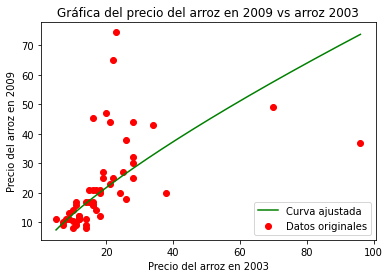

In [328]:
plt.scatter(x_2,y_2,color="red", label="Datos originales")
plt.plot(x_dom_2,pred_2_log_or, color="green", label="Curva ajustada")
plt.ylabel("Precio del arroz en 2009")
plt.xlabel("Precio del arroz en 2003")
plt.title("Gráfica del precio del arroz en 2009 vs arroz 2003")
plt.legend()
plt.show()

## Problema 3.

El Estudio de orientación de Berkeley  inscribió a niños nacidos en Berkeley, California, entre enero de 1928 y junio de 1929, y luego los midió periódicamente hasta los 18 años (Tuddenham y Snyder, 1954). Los datos que utilizamos incluyen alturas en centímetros a las edades de 2, 9 y 18 años ($\mathtt{HT2}$, $\mathtt{HT9}$ y $\mathtt{HT18}$), pesos en kilogramos ($\mathtt{WT2}$, $\mathtt{WT9}$ y $\mathtt{WT18}$), circunferencia de la pierna en centímetros ($\mathtt{LG2}$, $\mathtt{LG9}$ y $\mathtt{LG18}$) y fuerza en kilogramo ($\mathtt{ST2}$, $\mathtt{ST9}$ y $\mathtt{ST18}$). También se proporcionan dos medidas adicionales del tipo de cuerpo, $\mathtt{soma}$, somatotipo, una escala de 1, muy delgada, a 7, obesidad e índice de masa corporal, calculada como $\mathtt{IMC18}=\mathtt{WT18} / (\mathtt{HT18} / 100)^2$, peso en kilogramo dividido por el cuadrado de masa en metros, una medida estándar de la obesidad. 

## a)
Haga la matriz de diagramas de dispersión de $\mathtt{HT2}$, $\mathtt{HT9}$, $\mathtt{WT2}$, $\mathtt{WT9}$, $\mathtt{ST9}$, y $\mathtt{BMI18}$.

In [329]:
dataset_3 = pd.read_csv("../datasets/BGSgirls.csv")

In [330]:
dataset_3.head()

,Unnamed: 0,WT2,HT2,WT9,HT9,LG9,ST9,WT18,HT18,LG18,ST18,BMI18,Soma
0,67,13.6,87.7,32.5,133.4,28.4,74,56.9,158.9,34.6,143,22.5,5.0
1,68,11.3,90.0,27.8,134.8,26.9,65,49.9,166.0,33.8,117,18.1,4.0
2,69,17.0,89.6,44.4,141.5,31.9,104,55.3,162.2,35.1,143,21.0,5.5
3,70,13.2,90.3,40.5,137.1,31.8,79,65.9,167.8,39.3,148,23.4,5.5
4,71,13.3,89.4,29.9,136.1,27.7,83,62.3,170.9,36.3,152,21.3,4.5


In [331]:
dataset_4 = pd.DataFrame()

In [332]:
dataset_4["HT2"] = dataset_3["HT2"]
dataset_4["HT9"] = dataset_3["HT9"]
dataset_4["WT2"] = dataset_3["WT2"]
dataset_4["WT9"] = dataset_3["WT9"]
dataset_4["ST9"] = dataset_3["ST9"]
dataset_4["BMI18"] = dataset_3["BMI18"]






In [333]:
dataset_4.head()

,HT2,HT9,WT2,WT9,ST9,BMI18
0,87.7,133.4,13.6,32.5,74,22.5
1,90.0,134.8,11.3,27.8,65,18.1
2,89.6,141.5,17.0,44.4,104,21.0
3,90.3,137.1,13.2,40.5,79,23.4
4,89.4,136.1,13.3,29.9,83,21.3


array([[<AxesSubplot:xlabel='HT2', ylabel='HT2'>,
        <AxesSubplot:xlabel='HT9', ylabel='HT2'>,
        <AxesSubplot:xlabel='WT2', ylabel='HT2'>,
        <AxesSubplot:xlabel='WT9', ylabel='HT2'>,
        <AxesSubplot:xlabel='ST9', ylabel='HT2'>,
        <AxesSubplot:xlabel='BMI18', ylabel='HT2'>],
       [<AxesSubplot:xlabel='HT2', ylabel='HT9'>,
        <AxesSubplot:xlabel='HT9', ylabel='HT9'>,
        <AxesSubplot:xlabel='WT2', ylabel='HT9'>,
        <AxesSubplot:xlabel='WT9', ylabel='HT9'>,
        <AxesSubplot:xlabel='ST9', ylabel='HT9'>,
        <AxesSubplot:xlabel='BMI18', ylabel='HT9'>],
       [<AxesSubplot:xlabel='HT2', ylabel='WT2'>,
        <AxesSubplot:xlabel='HT9', ylabel='WT2'>,
        <AxesSubplot:xlabel='WT2', ylabel='WT2'>,
        <AxesSubplot:xlabel='WT9', ylabel='WT2'>,
        <AxesSubplot:xlabel='ST9', ylabel='WT2'>,
        <AxesSubplot:xlabel='BMI18', ylabel='WT2'>],
       [<AxesSubplot:xlabel='HT2', ylabel='WT9'>,
        <AxesSubplot:xlabel='HT9', ylabel

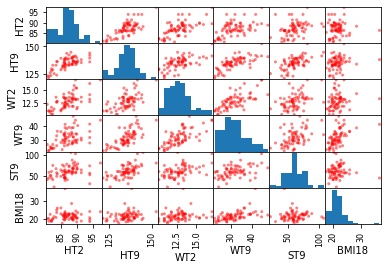

In [334]:
pd.plotting.scatter_matrix(dataset_4, alpha=0.5, color="red", grid=False)

## b)
Ajuste el modelo de regresión lineal por mínimos cuadrados para la variable $y=\mathtt{BMI18}$ versus $x_1=\mathtt{HT2}$, $x_2=\mathtt{WT2}$, $x_3=\mathtt{HT9}$, $x_4=\mathtt{WT9}$ y $x_5=\mathtt{ST9}$.

$$y = ax_1+bx_2+cx_3+dx_4+ex_5+f$$

In [335]:
X_3 = dataset_4.iloc[:,[0,1,2,3,4]].values

In [336]:
X_3

array([[ 87.7, 133.4,  13.6,  32.5,  74. ],
       [ 90. , 134.8,  11.3,  27.8,  65. ],
       [ 89.6, 141.5,  17. ,  44.4, 104. ],
       [ 90.3, 137.1,  13.2,  40.5,  79. ],
       [ 89.4, 136.1,  13.3,  29.9,  83. ],
       [ 85.5, 130.6,  11.3,  22.8,  60. ],
       [ 90.2, 136. ,  11.6,  30. ,  67. ],
       [ 82.2, 128. ,  11.6,  24.3,  44. ],
       [ 85.6, 132.4,  12.4,  29.9,  76. ],
       [ 97.3, 152.5,  17. ,  44.5,  81. ],
       [ 87.1, 138.4,  12.2,  31.8,  59. ],
       [ 88.9, 135.2,  15. ,  32.1,  67. ],
       [ 87.6, 142.3,  14.5,  39.2,  72. ],
       [ 82.6, 129.1,  10.2,  23.7,  40. ],
       [ 87.1, 133.2,  12.2,  26. ,  40. ],
       [ 84. , 136.3,  12.8,  36.3,  54. ],
       [ 83.6, 133.1,  13.6,  29.9,  67. ],
       [ 81.4, 123.2,  10.9,  22.2,  58. ],
       [ 89.7, 135.8,  13.1,  34.4,  57. ],
       [ 88.4, 139.5,  13.4,  35.5,  61. ],
       [ 86.4, 139.4,  11.8,  33. ,  64. ],
       [ 83.8, 124.2,  12.7,  25.7,  48. ],
       [ 87.6, 135.6,  11.8,  29

In [337]:
y_3 = dataset_4["BMI18"].values

In [338]:
len(y_3)

70

In [339]:
y_3 = y_3.reshape((-1,1))

In [340]:
y_3.shape

(70, 1)

In [341]:
X_3.shape

(70, 5)

In [342]:
x_3_unos = np.ones((X_3.shape[0],1))

In [343]:
x_3_unos.shape

(70, 1)

In [344]:
X_3 = np.concatenate((x_3_unos,X_3), axis = 1)

In [345]:
X_3

array([[  1. ,  87.7, 133.4,  13.6,  32.5,  74. ],
       [  1. ,  90. , 134.8,  11.3,  27.8,  65. ],
       [  1. ,  89.6, 141.5,  17. ,  44.4, 104. ],
       [  1. ,  90.3, 137.1,  13.2,  40.5,  79. ],
       [  1. ,  89.4, 136.1,  13.3,  29.9,  83. ],
       [  1. ,  85.5, 130.6,  11.3,  22.8,  60. ],
       [  1. ,  90.2, 136. ,  11.6,  30. ,  67. ],
       [  1. ,  82.2, 128. ,  11.6,  24.3,  44. ],
       [  1. ,  85.6, 132.4,  12.4,  29.9,  76. ],
       [  1. ,  97.3, 152.5,  17. ,  44.5,  81. ],
       [  1. ,  87.1, 138.4,  12.2,  31.8,  59. ],
       [  1. ,  88.9, 135.2,  15. ,  32.1,  67. ],
       [  1. ,  87.6, 142.3,  14.5,  39.2,  72. ],
       [  1. ,  82.6, 129.1,  10.2,  23.7,  40. ],
       [  1. ,  87.1, 133.2,  12.2,  26. ,  40. ],
       [  1. ,  84. , 136.3,  12.8,  36.3,  54. ],
       [  1. ,  83.6, 133.1,  13.6,  29.9,  67. ],
       [  1. ,  81.4, 123.2,  10.9,  22.2,  58. ],
       [  1. ,  89.7, 135.8,  13.1,  34.4,  57. ],
       [  1. ,  88.4, 139.5,  1

In [346]:
pesos_3 = regresion_lineal(X_3,y_3)

In [347]:
pesos_3

array([[ 3.08553348e+01],
       [-1.93997084e-01],
       [ 8.05707429e-03],
       [-3.17779385e-01],
       [ 4.19762397e-01],
       [-4.44160339e-02]])

## Regresión polinomial.
Veamos un ejemplo de como aplicar el algoritmo de regresión lineal para poder hacer una regresión polinomial. En este caso, se transforman las variables a las potencias deseadas del polinomio por lo que cada estimador o peso $\hat{\beta}_i$ es el coeficiente que multiplica a una cierta potencia de la variable de nuestro polinomio.


In [348]:
dataset_5 = pd.read_csv("../datasets/Position_Salaries.csv")

In [349]:
dataset_5.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [350]:
x_5 = dataset_5["Level"].values

In [351]:
y_5 = dataset_5["Salary"].values

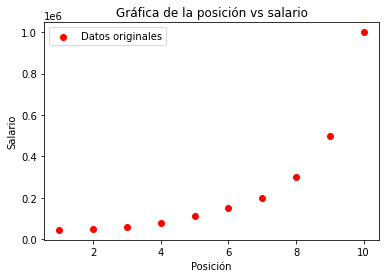

In [352]:
plt.scatter(x_5,y_5,color="red", label="Datos originales")
plt.ylabel("Salario")
plt.xlabel("Posición")
plt.title("Gráfica de la posición vs salario")
plt.legend()
plt.show()

In [353]:
x_5_unos = np.ones((len(x_5),1))

In [354]:
x_5 = x_5.reshape((-1,1))

In [355]:
x_5_cuadrado = x_5**2

In [356]:
X_5 = np.concatenate((x_5_unos,x_5,x_5_cuadrado), axis = 1)

In [357]:
X_5

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [358]:
y_5 = y_5.reshape((-1,1))

In [359]:
pesos_5 = regresion_lineal(X_5,y_5)

In [360]:
pesos_5

array([[ 232166.66666666],
       [-132871.21212121],
       [  19431.81818182]])

In [361]:
y_5_pred = np.matmul(X_5,pesos_5)

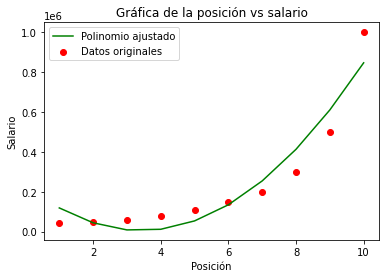

In [362]:
plt.scatter(x_5.ravel(),y_5.ravel(),color="red", label="Datos originales")
plt.plot(x_5.ravel(), y_5_pred.ravel(), color = "green", label ="Polinomio ajustado")
plt.ylabel("Salario")
plt.xlabel("Posición")
plt.title("Gráfica de la posición vs salario")
plt.legend()
plt.show()

In [363]:
x_5_cubico = x_5**3

In [364]:
x_5_cuarta = x_5**4

In [365]:
x_5_cubico.shape

(10, 1)

In [366]:
X_5 = np.concatenate((X_5,x_5_cubico,x_5_cuarta), axis=1 )

In [367]:
X_5

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [368]:
pesos_5_cuarto = regresion_lineal(X_5, y_5)

In [369]:
pesos_5_cuarto

array([[ 184166.66666229],
       [-211002.33099938],
       [  94765.44288935],
       [ -15463.28671313],
       [    890.15151514]])

In [370]:
pred_5_cuarto = np.matmul(X_5, pesos_5_cuarto)

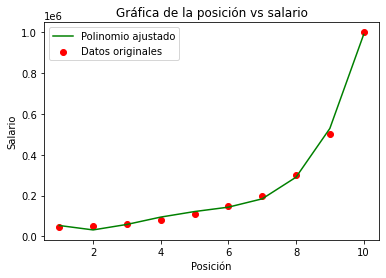

In [371]:
plt.scatter(x_5.ravel(),y_5.ravel(),color="red", label="Datos originales")
plt.plot(x_5.ravel(), pred_5_cuarto.ravel(), color = "green", label ="Polinomio ajustado")
plt.ylabel("Salario")
plt.xlabel("Posición")
plt.title("Gráfica de la posición vs salario")
plt.legend()
plt.show()

## Coeficiente de determinación $R^2$

El coeficiente de determinación $R^2$ nos dice que tan buena fue la bondad de ajuste. El máximo valor es 1 que dice que la curva ajustada fue perfecta y logro predecir exactamente todos los datos.
Se define de la siguiente forma:
$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$
en donde $SS_{res}=\sum_{i=1}^n(y_i-\hat{y_i})^2=(y-\hat{y}) \cdot (y-\hat{y})$, $SS_{tot}=\sum_{i=1}^n(y_i-\bar{y})^2=(y-\bar{y}) \cdot (y-\bar{y})$, $\hat{y_i}$ es el valor predicho para la $x_i$ y $\bar{y}$ es el promedio de las $y$.

In [372]:
def R_2(y,y_pred):
    y = y.ravel()
    y_pred = y_pred.ravel()
    y_mean = np.mean(y)
    ss_res = np.dot(y-y_pred,y-y_pred)
    ss_tot = np.dot(y-y_mean,y-y_mean)
    return 1-(ss_res/ss_tot)

In [373]:
r_2_polinomio_4= R_2(y_5,pred_5_cuarto)

In [374]:
r_2_polinomio_4

0.9973922891706613

In [375]:
r_2_polinomio_2 = R_2(y_5,y_5_pred)

In [376]:
r_2_polinomio_2

0.9162082221443943

# Descenso por el gradiente.


A pesar de que tenemos un método exacto para realizar la regresión lineal, para grandes cantidades de datos no es muy eficiente en términos de tiempo de ejecución. Para solucionar ese problema se utiliza un método numérico para encontrar el mínimo en la función de error (función de costo).
El descenso del gradiente es un algoritmo para encontrar un mínimo local en una función diferenciable.
Este algoritmo se basa en la observación de que la función $f$ decrece más rápido si se va en la dirección de $-\nabla f$. Entonces para encontrar el mínimo se hace una iteración de la siguiente forma:
$$x_{n+1} = x_n-\alpha \nabla f(x_{n})$$
En donde $\alpha$ es un número suficientemente pequeño, al que comunmente se le conoce como "tasa de aprendizaje".
La elección de alpha es importante para que el algoritmo logre converger optimamente. Observemos unas imágenes para explicarlo visualmente.
![](https://miro.medium.com/max/1618/0*J8Gsz4498OOwD1Xd.png)
Una tasa de aprendizaje muy pequeña asegura llegar al mínimo pero en un número muy grande de iteraciones, mientras que una muy grande no va a converger.

Otro de los principales problemas que se tiene es encontrar el mínimo global de una función, ya que este método puede converger a un mínimo local y no al global. Si la función es convexa este problema se soluciona ya que en este tipo de funciones todo mínimo local es mínimo global. Es por eso que a continuación demostraremos que nuestra función de error (costo) RSS (a la que de ahora en adelante llamaremos $J(\theta)$) es convexa.
![](https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fhome.agh.edu.pl%2F~horzyk%2Flectures%2Fai%2FGradientDescentOfErrorFunction.jpg&f=1&nofb=1)


**Definición 2:** (Conjunto convexo) Sea $S$ un espacio vectorial sobre los número reales. Se dice que $C \subseteq S$ es convexo si para todo $x,y \in C$ el segmento de línea que los une está en $C$, es decir $(1-t)x+ty \in C$, para todo $x,y \in C$ con $t \in [0,1]$

**Definición 3:** (Función convexa) Sea $X$ un conjunto convexo en un espacio vectorial y $f: X \rightarrow \mathbb{R}$ una función. Se dice que $f$ es convexa sí:
$$\forall x_1,x_2 \in X, \forall t \in [0,1]: \quad  f(tx_1 + (1-t)x_2)\leq tf(x_1) + (1-t)f(x_2)$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Convex_Function.png/1024px-Convex_Function.png)

**Proposición 3:** Sea $f: \mathbb{R} \rightarrow \mathbb{R}$ con $f(x) = x^2$, entonces $f$ es convexa.


**Demostración:**

Tomemos $x_1,x_2 \in  \mathbb{R}$ y $t \in [0,1]$, queremos probar que $f(tx_1 + (1-t)x_2)\leq tf(x_1) + (1-t)f(x_2)$.

Como $t \in [0,1]$ entonces $t^2\leq t$ $\implies$ $(t^2-t)\leq 0$. Al ser $(x_1-x_2)^2\geq 0$ se sigue que:
$$0\geq (t^2-t)(x_1-x_2)^2\\
   \quad \quad \quad \quad \quad     = -(t-t^2)[(x_1-x_2)^2+x_1^2-x_1^2]\\
   \quad \quad \quad \quad \quad \quad \quad   = -(t-t^2)[x_1^2-2x_1x_2+x_2^2+x_1^2-x_1^2]\\
   \quad \quad \quad \quad    = -(1-t)t[-2x_1x_2 + x_2^2 + x_1^2]\\
   \quad \quad \quad \quad \quad \quad= (1-t)[2tx_1x_2 -tx_2^2]-(t-t^2)x_1^2\\
   \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad = (1-t)[2tx_1x_2 +x_2^2(-t+1-1)]-(t-t^2)x_1^2\\
   \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad = (1-t)[2tx_1x_2 + (1-t)x_2^2 - x_2^2]-(t-t^2)x_1^2\\
   \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad = 2t(1-t)x_1x_2 + (1-t)^2x_2^2-(1-t)x_2^2-(t-t^2)x_1^2\\
   \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad = 2t(1-t)x_1x_2 + (1-t)^2x_2^2-(1-t)x_2^2-tx_1^2+t^2x_1^2\\
   \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad = t^2x_1^2+ 2t(1-t)x_1x_2 + (1-t)^2x_2^2 - tx_1^2 - (1-t)x_2^2\\
   \quad \quad \quad \quad \quad \quad  = (tx_1 + (1-t)x_2)^2 - tx_1^2 - (1-t)x_2^2$$
   
  $$ \implies 0 \geq (tx_1 + (1-t)x_2)^2 - tx_1^2 - (1-t)x_2^2 \\
  \implies tx_1^2 + (1-t)x_2^2 \geq (tx_1 + (1-t)x_2)^2\\
  \implies tf(x_1) + (1-t)f(x_2) \geq f(tx_1 + (1-t)x_2)$$
  Por lo tanto concluimos que $f$ es convexa.


**Proposición 4:** Sea $J: \mathbb{R}^d \rightarrow \mathbb{R}$ con $J(\theta) = (y-X\theta)^T(y-X\theta)$, es decir, $J=RSS$, entonces la función $J$ es convexa.

**Demostración:**

Al hacer la multiplicación de matrices de arriba queda $J$ de la siguiente forma:
$$J(\theta) = \sum_{i = 1}^n (y_i - (X\theta)_i)^2$$
Sea $f: \mathbb{R} \rightarrow \mathbb{R}$ con $f(x) = x^2$, entonces:
$$J(\theta) = \sum_{i = 1}^n f(y_i - (X\theta)_i)$$
Tomemos $\theta_1, \theta_2 \in \mathbb{R}^d$ y $t \in [0,1]$, se sigue que:
$$J(t\theta_1 + (1-t)\theta_2) = \sum_{i = 1}^n f\left(t(y_i - (X\theta_1)_i)+(1-t)(y_i - (X\theta_2)_i)\right)\\
\quad \quad \quad \quad \quad \quad \quad \stackrel{Proposición 3}{\leq} \sum_{i = 1}^n tf\left(y_i - (X\theta_1)_i\right)+(1-t)f\left(y_i - (X\theta_2)_i\right) \\
\quad \quad \quad \quad \quad \quad \quad \quad \quad = t\sum_{i = 1}^n f\left(y_i - (X\theta_1)_i\right) + (1-t)\sum_{i = 1}^n f\left(y_i - (X\theta_2)_i\right)\\
 = tJ(\theta_1) + (1-t)J(\theta_2)$$
 Por lo tanto:
 $$J(t\theta_1 + (1-t)\theta_2) \leq tJ(\theta_1) + (1-t)J(\theta_2)$$
 Concluimos que $J$ es convexa.

Al demostrar que nuestra función de error (costo) es convexa entonces con el método del descenso del gradiente podemos asegurar convergencia al mínimo global. Ahora encontremos el gradiente de $J$, es decir $\nabla_{\theta}J$.
 Recordemos que si derivamos un escalar con respecto a un vector tenemos:
 $\frac{dx}{d\bar{w}} = (\frac{dx}{dw_1}, \dots , \frac{dx}{dw_n})$, entonces esto sería el equivalente a encontrar el gradiente de una función. Recordemos que en la Proposición 2 calculamos $\frac{dRSS}{d\widehat{\beta}}$, lo cual corresponde a $\nabla_{\widehat{\beta}}J$.
De la derivada de la Proposición 2 se sigue que:
$$\nabla_{\widehat{\beta}}J = -2y^TX + 2\hat{\beta}^TX^TX$$
Como podemos ver, este es un vector de $1\times d$ (con d el número de características del conjunto de datos), pero $\widehat{\beta}$ es de $d \times 1$, entonces para hacer la iteración del descenso del gradiente vamos a tomar la transpuesta de $\nabla_{\widehat{\beta}}J$. Finalmente, nuestro metodo iterativo usando descenso del gradiente queda como:
$$\widehat{\beta}_{n+1} = \widehat{\beta}_n - \alpha (-2y^TX + 2\hat{\beta_n}^TX^TX)^T$$

In [377]:
def descenso_gradiente(lr,iteraciones,X,y):
    pesos_inicial = np.zeros((X.shape[1],1))
    for i in range(iteraciones):
        pesos_inicial = pesos_inicial -lr*(-2*np.matmul(y.T,X)+2*np.matmul(np.matmul(pesos_inicial.T,X.T),X)).T
        
    return pesos_inicial
    

In [378]:
pesos

array([[25792.20019867],
       [ 9449.96232146]])

In [379]:
X

array([[ 1. ,  1.1],
       [ 1. ,  1.3],
       [ 1. ,  1.5],
       [ 1. ,  2. ],
       [ 1. ,  2.2],
       [ 1. ,  2.9],
       [ 1. ,  3. ],
       [ 1. ,  3.2],
       [ 1. ,  3.2],
       [ 1. ,  3.7],
       [ 1. ,  3.9],
       [ 1. ,  4. ],
       [ 1. ,  4. ],
       [ 1. ,  4.1],
       [ 1. ,  4.5],
       [ 1. ,  4.9],
       [ 1. ,  5.1],
       [ 1. ,  5.3],
       [ 1. ,  5.9],
       [ 1. ,  6. ],
       [ 1. ,  6.8],
       [ 1. ,  7.1],
       [ 1. ,  7.9],
       [ 1. ,  8.2],
       [ 1. ,  8.7],
       [ 1. ,  9. ],
       [ 1. ,  9.5],
       [ 1. ,  9.6],
       [ 1. , 10.3],
       [ 1. , 10.5]])

In [380]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [381]:
pesos_descenso = descenso_gradiente(0.0005,5000,X,y)

In [382]:
pesos_descenso

array([[25792.20019867],
       [ 9449.96232146]])

In [383]:
pesos 

array([[25792.20019867],
       [ 9449.96232146]])

In [384]:
pesos_descenso_3 = descenso_gradiente(0.000000005,100, X_3, y_3) 

In [385]:
pesos_descenso_3

array([[0.00062208],
       [0.0541829 ],
       [0.08404213],
       [0.00797547],
       [0.02005901],
       [0.03695315]])

In [386]:
pesos_3

array([[ 3.08553348e+01],
       [-1.93997084e-01],
       [ 8.05707429e-03],
       [-3.17779385e-01],
       [ 4.19762397e-01],
       [-4.44160339e-02]])

# Encontrar una tasa de aprendizaje óptima.
A pesar de que el método del gradiente parece ser muy bueno para encontrar mínimos locales, un problema que se tiene es el de encontrar una tasa de aprendizaje óptima para poder llegar al mínimo en un número pequeño de iteraciones, ya que como vimos anteriormente sin una tasa de aprendizaje óptima se necesita un número muy grande de iteraciones o puede que no llegue a converger si la tasa de aprendizaje no es lo suficientemente pequeña.
Para solucionar este problema, se explicará un método que se conoce como "adaptative step size" y lo llamaremos "tasa de aprendizaje adaptativa".

### Método de Barzilai y Borwein
Este método propuesto en 1988 por Barzilai y Borwein es el de encontrar la tasa de aprendizaje ($\alpha$) que minimice la función $||\Delta \theta - \alpha \Delta g(\theta)||^2$, es decir:
$$\alpha_k = \underset{\alpha}{arg \, min} ||\Delta \theta - \alpha \Delta g(\theta)||^2$$

donde $\Delta \theta = \theta_k - \theta_{k-1}$ y  $\Delta g(\theta) = \nabla f(\theta_k)-\nabla f(\theta_{k-1})$. En este caso tomaremos que $f:\mathbb{R}^d \rightarrow \mathbb{R}$ y por ende $\theta \in \mathbb{R}^d$. 

La solución a este problema es resuelta facilmente derivando con respecto a $\alpha$ e igualando a 0 (minimizando la función mediante la derivada).

Primero notemos que: 
$$||\Delta \theta - \alpha \Delta g(\theta)||^2 = (\Delta \theta - \alpha \Delta g(\theta))\cdot (\Delta \theta - \alpha \Delta g(\theta)) = (\Delta \theta - \alpha \Delta g(\theta))^T (\Delta \theta - \alpha \Delta g(\theta)) = \Delta \theta^T\Delta \theta -\alpha \Delta \theta^T\Delta g(\theta) -\alpha \Delta g(\theta)^T \Delta \theta + \alpha^2\Delta g(\theta)^T\Delta g(\theta)$$
Entonces:
$$\frac{d\left(||\Delta \theta - \alpha \Delta g(\theta)||^2\right)}{d\alpha} = - \Delta \theta^T\Delta g(\theta) - \Delta g(\theta)^T \Delta \theta + 2\alpha\Delta g(\theta)^T\Delta g(\theta) = - \Delta g(\theta)^T \Delta \theta - \Delta g(\theta)^T \Delta \theta + 2\alpha\Delta g(\theta)^T\Delta g(\theta) = -2\Delta g(\theta)^T \Delta \theta + 2\alpha\Delta g(\theta)^T\Delta g(\theta)$$

Igualando la derivada a cero, se tiene:

$$-2\Delta g(\theta)^T \Delta \theta + 2\alpha\Delta g(\theta)^T\Delta g(\theta)=0$$
$$\implies -\Delta g(\theta)^T \Delta \theta + \alpha\Delta g(\theta)^T\Delta g(\theta)=0$$
$$\implies   \alpha\Delta g(\theta)^T\Delta g(\theta)= \Delta g(\theta)^T \Delta \theta$$
$$ \implies \alpha = \frac{\Delta g(\theta)^T\Delta \theta}{\Delta g(\theta)^T\Delta g(\theta)}$$
Con esto ya se logró obtener la forma en que se calculará el valor de $\alpha$ en cada iteración

Este enfoque trabaja realmente bien, incluso para problemas de grandes dimensiones.

En nuestro caso la función $f$ que describimos en el método es la función $J$ de costo o error, por lo que $\Delta g(\theta) = \nabla J(\theta_k)-\nabla J(\theta_{k-1})$

In [387]:
i = 1
while i<10:
    print("hola")
    i = i+1

hola
hola
hola
hola
hola
hola
hola
hola
hola


In [388]:
def descenso_grandiente_bw(X,y):
    lr = 0.001
    pesos = np.zeros((X.shape[1],1))
    iteraciones = 0
    error = 1
    while error > 1e-10:
        pesos_anteriores = pesos
        gradiente_anterior = (-2*np.matmul(y.T,X)+2*np.matmul(np.matmul(pesos_anteriores.T,X.T),X)).T
        pesos = pesos_anteriores -lr*gradiente_anterior
        gradiente_nuevo = (-2*np.matmul(y.T,X)+2*np.matmul(np.matmul(pesos.T,X.T),X)).T
        delta_g = gradiente_nuevo-gradiente_anterior
        delta_theta = pesos-pesos_anteriores
        lr = ((np.matmul(delta_g.T,delta_theta))/(np.matmul(delta_g.T, delta_g))).ravel()[0]
        iteraciones = iteraciones + 1
        error = abs(sum(delta_theta))

    return pesos


In [389]:
pesos

array([[25792.20019867],
       [ 9449.96232146]])

In [390]:
pesos_bw = descenso_grandiente_bw(X,y)

In [391]:
pesos_bw

array([[25792.20019867],
       [ 9449.96232146]])

In [392]:
pesos_3

array([[ 3.08553348e+01],
       [-1.93997084e-01],
       [ 8.05707429e-03],
       [-3.17779385e-01],
       [ 4.19762397e-01],
       [-4.44160339e-02]])

In [393]:
pesos_3_bw = descenso_grandiente_bw(X_3,y_3)

In [394]:
pesos_3_bw





array([[ 3.08452654e+01],
       [-1.93953275e-01],
       [ 8.11662230e-03],
       [-3.17800228e-01],
       [ 4.19728316e-01],
       [-4.44236922e-02]])